<a href="https://colab.research.google.com/github/Anurag8484/Machine-Learning-Practice/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the MNIST Dataset (From OpenML)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


In [ ]:
X,y = fetch_openml(name = 'mnist_784',
                   version = 1,
                    as_frame=True,
                    return_X_y = True)

In [ ]:
y = y.astype('int')  # Converting Y from String to Integer

### Find the Shape of Data

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
sorted(y.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X.describe().T['max'].max()

255.0

### Visualize some of the Samples

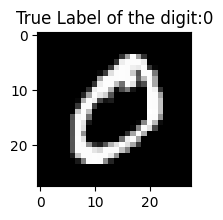

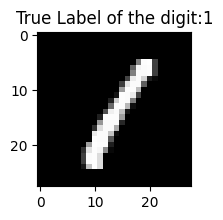

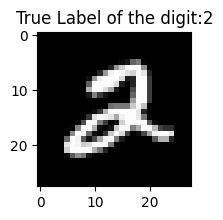

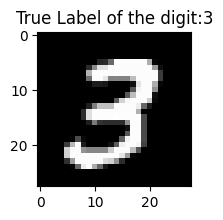

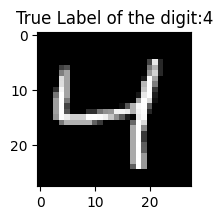

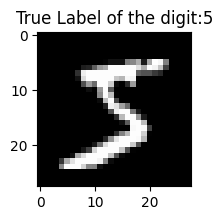

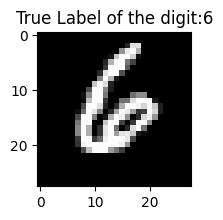

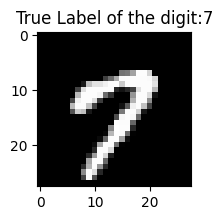

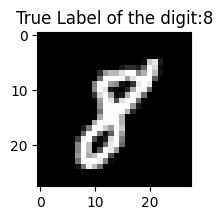

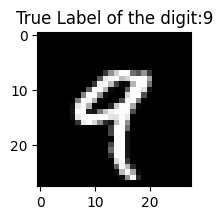

In [ ]:
for i_digit in range(10):   #Here 10 is Excluded.
    # Select a random sample for a digit.

  i_samples = X[y.values==i_digit].iloc[0].to_numpy().reshape(28,28)
    #plot the digit
  plt.figure(figsize=(2,2))
  plt.imshow(i_samples, cmap ='grey')

  plt.title(f'True Label of the digit:{i_digit}')



In [ ]:
y.values=='0'

array([False, False, False, ..., False, False, False])

### Find the Distribution of the Digits

<Axes: xlabel='class'>

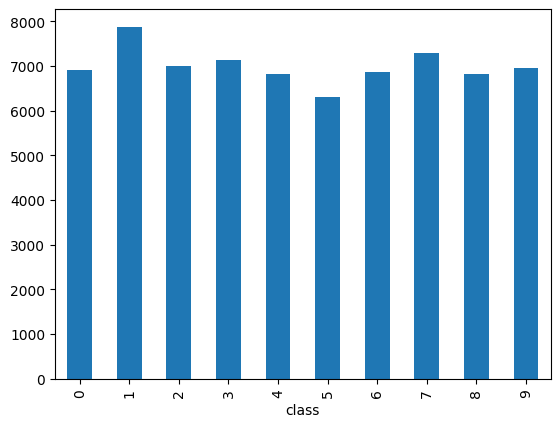

In [ ]:
y.value_counts().sort_index().plot(kind='bar')

### Chose the digit for Classification

In [ ]:
y_org = y.copy(deep=True)

In [ ]:
# Wherever y==2 , it assigns 1 and 0 elsewhere
y_new = np.where(y==2,1,0)

In [ ]:
np.where(y_org ==2)

(array([    5,    16,    25, ..., 69980, 69985, 69995]),)

In [ ]:
np.where(y_new==1)

(array([    5,    16,    25, ..., 69980, 69985, 69995]),)

In [ ]:
#Check if y_new and y_org are same or different

id(y_org),id(y_new)

(139289604629424, 139289620298704)

### Split the Data


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_new, train_size=0.7, stratify=y_new)

## Next Two Blocks because We used Stratify above

In [ ]:
pd.Series(y_train).value_counts()/y_train.shape[0]*100

,count
0,90.014286
1,9.985714


In [ ]:
pd.Series(y_test).value_counts()/y_test.shape[0]*100

,count
0,90.014286
1,9.985714


## Next Two Blocks because We didn't used Stratify above

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_new, train_size=0.7)

In [ ]:
pd.Series(y_train).value_counts()/y_train.shape[0]*100

,count
0,89.967347
1,10.032653


In [ ]:
pd.Series(y_test).value_counts()/y_test.shape[0]*100

,count
0,90.12381
1,9.87619


### Train SGDClassifier(LogisticRegression) and visualize training error vs number of epochs

In [ ]:
# first check number of missing Values
X.isna().sum().sum()

0

In [ ]:
# After that Scale

from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

In [ ]:
?SGDClassifier

In [ ]:
clf = SGDClassifier(loss='log_loss',
              alpha=0,
              eta0=0.005,
              learning_rate = 'constant',
              max_iter=1,   # We Use this because loss os calculated after every 1 iteration so that we can plot training loss curve
              warm_start=True)

In [ ]:
loss = []
num_iteration = 500
for i_epoch in range(num_iteration):
  clf.fit(X_train_scaled,y_train)
  y_prob = clf.predict_proba(X_train_scaled)
  loss.append(log_loss(y_train,y_prob))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Text(0, 0.5, 'Loss Function')

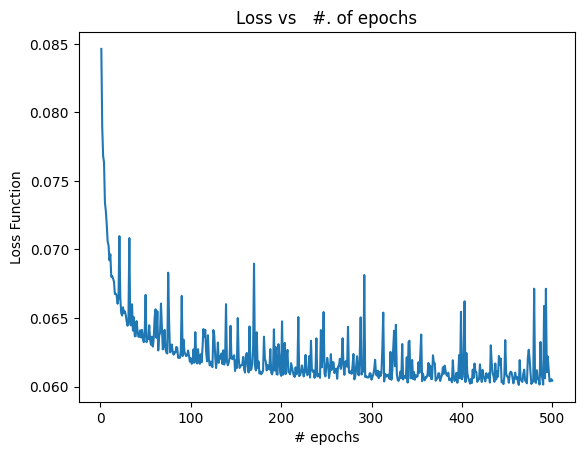

In [ ]:
plt.figure()
plt.plot(range(1,num_iteration+1),loss)
plt.title('Loss vs   #. of epochs')
plt.xlabel('# epochs')
plt.ylabel('Loss Function')


### Visualize Confusion matrix and compute precision, recall adn f1-score

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, f1_score,recall_score, accuracy_score

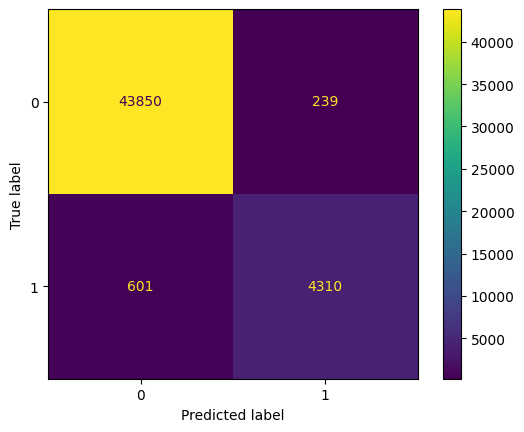

In [ ]:
y_train_pred = clf.predict(X_train_scaled)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)

In [ ]:
f1_score(y_train,y_train_pred)

0.9112050739957717

In [ ]:
accuracy_score(y_train,y_train_pred)

0.9828571428571429

In [ ]:
precision_score(y_train,y_train_pred)

0.9474609804352605

In [ ]:
recall_score(y_train,y_train_pred)

0.877621665648544

### Visualize Some correctly classified and misclassified samples

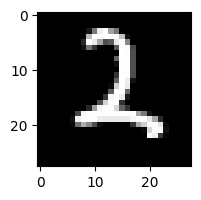

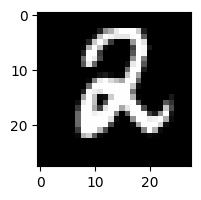

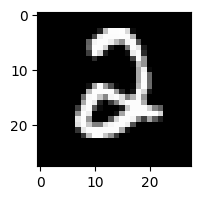

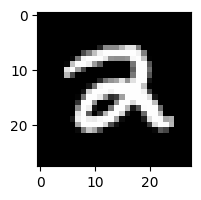

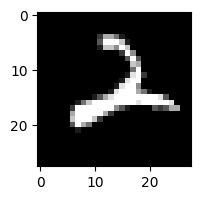

In [ ]:
for i in range(5):
  plt.figure(figsize=(2,2))
  i_sample_image =  X_train[(y_train==1) & (y_train_pred==1)].iloc[i].to_numpy().reshape(28,28)
  plt.imshow(i_sample_image,cmap='grey')
  plt.show()

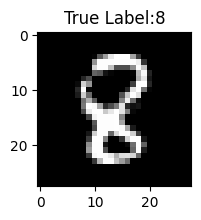

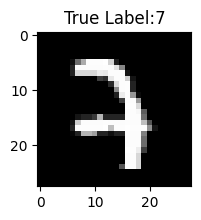

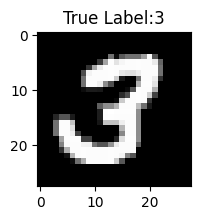

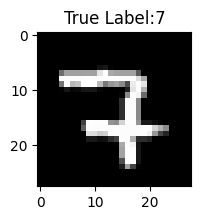

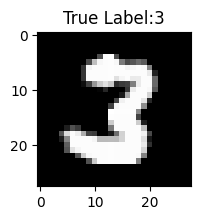

In [ ]:
for i in range(5):
  plt.figure(figsize=(2,2))
  i_sample_image =  X_train[(y_train==0) & (y_train_pred==1)].iloc[i]
  plt.title(f'True Label:{y.loc[i_sample_image.name]}')
  plt.imshow(i_sample_image.to_numpy().reshape(28,28),cmap='grey')
  plt.show()

### Which are the most and least important features. Is regilarization needed ?


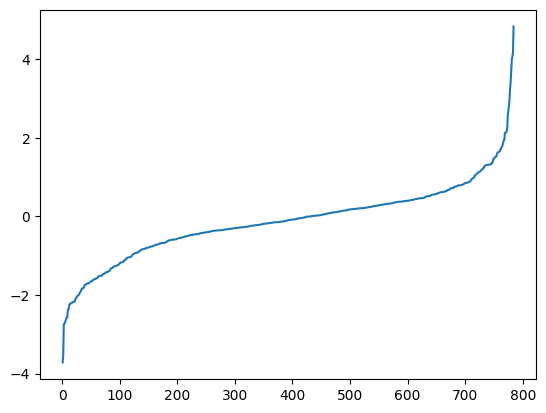

In [ ]:
plt.plot(range(1,785), clf.coef_.ravel())

In [ ]:
clf.coef_.ravel().sort()

In [ ]:
np.argmax(np.abs(clf.coef_.ravel()))

783

In [ ]:
np.argmin(np.abs(clf.coef_.ravel()))

431

In [ ]:
clf.coef_.ravel()[431]

0.0

# Plot the ROC Curve   (This tells us **`True Positive Rate (TPR) vs (FPR) False Positive Rate)`**

**`Sensitivity = True Positive Rate`**


In [ ]:
from sklearn.metrics import RocCurveDisplay


#### Below 0.5 means worse than random guessing and above means above than random guessing.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


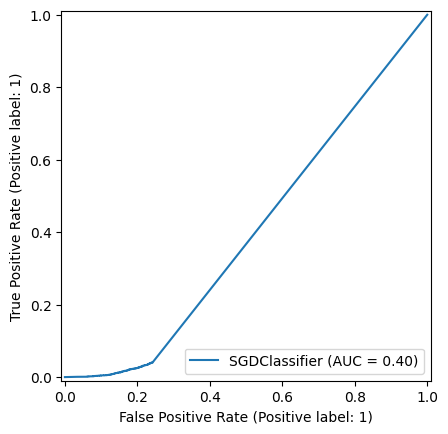

In [ ]:
RocCurveDisplay.from_estimator(clf, X_train_scaled, y_train)

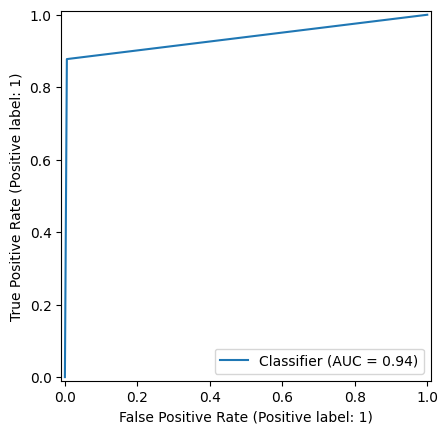

In [ ]:
RocCurveDisplay.from_predictions(y_train, y_train_pred)